<a href="https://colab.research.google.com/github/AzadMehedi/ML-Projects/blob/main/Data_Cleaning_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/DataProcessing/master/real-estate.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [ ]:
# Renaming Columns with inplace
df.rename(columns={'NUM_BEDROOMS':'BEDROOMS', 'NUM_BATH':'BATH'}, inplace=True) 
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# Cheking NaN values
df.isna().values.any()

True

In [ ]:
df.isna().values.sum()

8

In [ ]:
#Showing the null values as per attributes
null_columns=df.columns[df.isna().any()]
df[null_columns].isna().sum()

PID             1
ST_NUM          2
OWN_OCCUPIED    1
BEDROOMS        2
BATH            1
SQ_FT           1
dtype: int64

In [ ]:
df[df.isna().any(axis=1)][null_columns]

,PID,ST_NUM,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
2,100003000.0,NaN,N,NaN,1,850
3,100004000.0,201.0,12,1,NaN,700
4,NaN,203.0,Y,3,2,1600
5,100006000.0,207.0,Y,NaN,1,800
6,100007000.0,NaN,NaN,2,HURLEY,950
7,100008000.0,213.0,Y,1,1,NaN


In [ ]:
# filling null values with specific values
df['PID'].fillna(100005000, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# dropping columns temporary. 
# for permanent dropping use inplace=True parameter
df.drop('PID', axis=1)


,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,104.0,PUTNAM,Y,3,1,1000
1,197.0,LEXINGTON,N,3,1.5,--
2,NaN,LEXINGTON,N,NaN,1,850
3,201.0,BERKELEY,12,1,NaN,700
4,203.0,BERKELEY,Y,3,2,1600
5,207.0,BERKELEY,Y,NaN,1,800
6,NaN,WASHINGTON,NaN,2,HURLEY,950
7,213.0,TREMONT,Y,1,1,NaN
8,215.0,TREMONT,Y,na,2,1800


In [ ]:
# dropping rows temporary. 
# for permanent dropping use inplace=True parameter
df.drop([1,2])

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# row wise data filling
df.loc[2, 'ST_NUM'] = 197
df.loc[6, 'ST_NUM'] = 208
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,197.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,208.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# unwanted value treatment
cnt = 0
for row in df['OWN_OCCUPIED']:
  try:
    int(row)
    df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
  except ValueError:
    pass
  cnt += 1

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,197.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,208.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
df['BEDROOMS'] = pd.to_numeric(df['BEDROOMS'], errors='coerce')
df['BATH'] = pd.to_numeric(df['BATH'], errors='coerce')
df['SQ_FT'] = pd.to_numeric(df['SQ_FT'], errors='coerce')

df


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [ ]:
# filling NaN values using Mode
df['OWN_OCCUPIED'].fillna(df['OWN_OCCUPIED'].mode()[0], inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [ ]:
# findings 1,2 & 3 bedrooms MEDIAN value
#Group By parameter check
df.groupby('BEDROOMS')['SQ_FT'].median()

BEDROOMS
1.0     700.0
2.0     950.0
3.0    1300.0
Name: SQ_FT, dtype: float64

In [ ]:
# filling NaN values of SQ_FT column by MEDIAN values
df['SQ_FT'] = df['SQ_FT'].fillna(df.groupby('BEDROOMS')['SQ_FT'].transform('median'))
df['SQ_FT'] = df['SQ_FT'].fillna(df['SQ_FT'].median())
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [ ]:
# filling NaN values of BEDROOMS column for 
# if SQ_RD <950 = 1 BEDROOM
# if SQ_RD >1000 = 3 BEDROOM

df.loc[2, 'BEDROOMS'] = 1
df.loc[5, 'BEDROOMS'] = 1
df.loc[8, 'BEDROOMS'] = 3
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,1.0,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [ ]:
# filling NaN values of BATH column using bfill parameter. bfill=bellow column fill
df['BATH'] = df['BATH'].fillna(method='bfill')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,2.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,1.0,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [ ]:
# type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   BEDROOMS      9 non-null      float64
 5   BATH          9 non-null      float64
 6   SQ_FT         9 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [ ]:
df['PID'] = df['PID'].astype('int64')
df['ST_NUM'] = df['ST_NUM'].astype('int64')
df['BEDROOMS'] = df['BEDROOMS'].astype('int64')
df['BATH'] = df['BATH'].astype('int64')
df['SQ_FT'] = df['SQ_FT'].astype('int64')

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1300
2,100003000,197,LEXINGTON,N,1,1,850
3,100004000,201,BERKELEY,Y,1,2,700
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,1,1,800
6,100007000,208,WASHINGTON,Y,2,1,950
7,100008000,213,TREMONT,Y,1,1,700
8,100009000,215,TREMONT,Y,3,2,1800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           9 non-null      int64 
 1   ST_NUM        9 non-null      int64 
 2   ST_NAME       9 non-null      object
 3   OWN_OCCUPIED  9 non-null      object
 4   BEDROOMS      9 non-null      int64 
 5   BATH          9 non-null      int64 
 6   SQ_FT         9 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 632.0+ bytes


# NOTE:
#` Now this is a clean Dataset`

### When to use Which method:
1. Using mean is not logical if there are outliers in the data.

2. In case of categorical data neither mean nor median is meaningful in which case using mode can be meaningful.

3. Median is very useful for continuous data.

4. Filling missing values ​​with 0 is also sometimes meaningful in regression models.
 
5. Normal method is not meaningful for time series data, moving average or other methods can be used.

# Feature Engineering or Data Transformation

### Label Encoding
- we can assign different numbers on unique categorical values by Label Encidig

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['ST_NAME'] = le.fit_transform(df['ST_NAME'])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,2,Y,3,1,1000
1,100002000,197,1,N,3,1,1300
2,100003000,197,1,N,1,1,850
3,100004000,201,0,Y,1,2,700
4,100005000,203,0,Y,3,2,1600
5,100006000,207,0,Y,1,1,800
6,100007000,208,4,Y,2,1,950
7,100008000,213,3,Y,1,1,700
8,100009000,215,3,Y,3,2,1800


### mapping function
- By using mapping function, we can convert Numerical data to Categorical and Categorical data to Numerical data.

In [ ]:
# use of mapping function
mapping = {'Y':1, 'N':2}
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].map(mapping)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,2,1,3,1,1000
1,100002000,197,1,2,3,1,1300
2,100003000,197,1,2,1,1,850
3,100004000,201,0,1,1,2,700
4,100005000,203,0,1,3,2,1600
5,100006000,207,0,1,1,1,800
6,100007000,208,4,1,2,1,950
7,100008000,213,3,1,1,1,700
8,100009000,215,3,1,3,2,1800


### One hot Encoder
- By one hot encoder we can convert categorical variable into different columns & columns contain Boolean(True or False) or (0 or 1) values.

In [ ]:
# One Hot Encoding for nominal data
# This encoding is done via the OneHotEncoderf component, but we'll implement it via its dummy variables using the get_dummiesf component.

df1 = pd.get_dummies(df, columns=['OWN_OCCUPIED'])
df1

,PID,ST_NUM,ST_NAME,BEDROOMS,BATH,SQ_FT,OWN_OCCUPIED_1,OWN_OCCUPIED_2
0,100001000,104,2,3,1,1000,1,0
1,100002000,197,1,3,1,1300,0,1
2,100003000,197,1,1,1,850,0,1
3,100004000,201,0,1,2,700,1,0
4,100005000,203,0,3,2,1600,1,0
5,100006000,207,0,1,1,800,1,0
6,100007000,208,4,2,1,950,1,0
7,100008000,213,3,1,1,700,1,0
8,100009000,215,3,3,2,1800,1,0


# scaling

### Min Max Scaler (Min Max Normalizer)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled 

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,0.000,0.000000,0.50,0.0,1.0,0.0,0.272727
1,0.125,0.837838,0.25,1.0,1.0,0.0,0.545455
2,0.250,0.837838,0.25,1.0,0.0,0.0,0.136364
3,0.375,0.873874,0.00,0.0,0.0,1.0,0.000000
4,0.500,0.891892,0.00,0.0,1.0,1.0,0.818182
5,0.625,0.927928,0.00,0.0,0.0,0.0,0.090909
6,0.750,0.936937,1.00,0.0,0.5,0.0,0.227273
7,0.875,0.981982,0.75,0.0,0.0,0.0,0.000000
8,1.000,1.000000,0.75,0.0,1.0,1.0,1.000000


### Standard Scaler
- Standardization standardizes scalar datasets. Standard scalar functions and dataset values ​​are converted to standard form according to the equation below. Standardization is done by subtracting the mean value of a data and the variable divided by their standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaledstd = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
df_scaledstd

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,-1.549193,-2.779199,0.312348,-0.534522,1.06066,-0.707107,-0.206195
1,-1.161895,0.096190,-0.390434,1.870829,1.06066,-0.707107,0.589128
2,-0.774597,0.096190,-0.390434,1.870829,-1.06066,-0.707107,-0.603856
3,-0.387298,0.219862,-1.093216,-0.534522,-1.06066,1.414214,-1.001517
4,0.000000,0.281699,-1.093216,-0.534522,1.06066,1.414214,1.384450
5,0.387298,0.405371,-1.093216,-0.534522,-1.06066,-0.707107,-0.736410
6,0.774597,0.436290,1.717911,-0.534522,0.00000,-0.707107,-0.338748
7,1.161895,0.590880,1.015129,-0.534522,-1.06066,-0.707107,-1.001517
8,1.549193,0.652717,1.015129,-0.534522,1.06066,1.414214,1.914665


### Robust Scaler
- 
The robust scalar is similar to the min-max scalar, except that interquartile ranges are used instead of minimum and maximum values. In this method, the 1st quartile value is subtracted from the data and this subtraction is divided by the interquartile range.

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
robust_scaled_df = robust.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df,columns=df.columns)
robust_scaled_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,-1.00,-9.000000,0.333333,0.0,0.5,0.0,0.1
1,-0.75,-0.545455,0.000000,1.0,0.5,0.0,0.7
2,-0.50,-0.545455,0.000000,1.0,-0.5,0.0,-0.2
3,-0.25,-0.181818,-0.333333,0.0,-0.5,1.0,-0.5
4,0.00,0.000000,-0.333333,0.0,0.5,1.0,1.3
5,0.25,0.363636,-0.333333,0.0,-0.5,0.0,-0.3
6,0.50,0.454545,1.000000,0.0,0.0,0.0,0.0
7,0.75,0.909091,0.666667,0.0,-0.5,0.0,-0.5
8,1.00,1.090909,0.666667,0.0,0.5,1.0,1.7


### Transpose Function


In [ ]:
transposed_df = df.transpose()
transposed_df

,0,1,2,3,4,5,6,7,8
PID,100001000,100002000,100003000,100004000,100005000,100006000,100007000,100008000,100009000
ST_NUM,104,197,197,201,203,207,208,213,215
ST_NAME,2,1,1,0,0,0,4,3,3
OWN_OCCUPIED,1,2,2,1,1,1,1,1,1
BEDROOMS,3,3,1,1,3,1,2,1,3
BATH,1,1,1,2,2,1,1,1,2
SQ_FT,1000,1300,850,700,1600,800,950,700,1800


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-dhaka-weather1953-2016.csv'
df = pd.read_csv(url)
df.head()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


In [ ]:
# checking null values
df.isna().values.any()

False

In [ ]:
# checking Descriptive statistics
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


In [ ]:
# checking linear correlations among different columns
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000e+00,7.480458e-16,0.044080,0.098500,-0.165042,-0.009006
Month,7.480458e-16,1.000000e+00,-0.134986,0.210387,0.481070,0.125966
MaxTemp,4.407971e-02,-1.349862e-01,1.000000,0.724186,0.097398,0.365135
MinTemp,9.849999e-02,2.103873e-01,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-1.650420e-01,4.810704e-01,0.097398,0.624770,1.000000,0.708577
Rainfall,-9.006300e-03,1.259665e-01,0.365135,0.687317,0.708577,1.000000


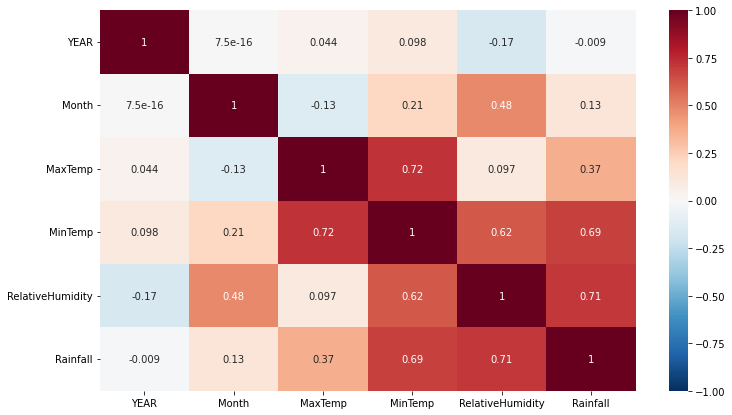

In [ ]:
# heatmap
correlation = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap='RdBu_r')
plt.show() 

Month
1       6.781250
2      19.703125
3      54.307812
4     126.431250
5     271.131250
6     360.075000
7     382.076563
8     313.971875
9     284.639063
10    164.120313
11     28.017187
12      9.271875
Name: Rainfall, dtype: float64


<AxesSubplot:xlabel='Month'>

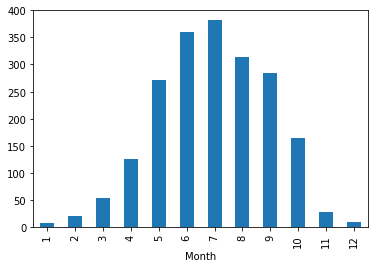

In [ ]:
# monthly rainfall
rain = df.groupby('Month')['Rainfall'].mean()
print(rain)
rain.plot(kind='bar')

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

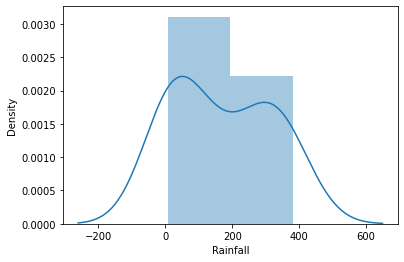

In [ ]:
# Distribution PLot
sns.distplot(rain)

In [ ]:
# most rainfall month
df.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)

Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120313
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

<AxesSubplot:>

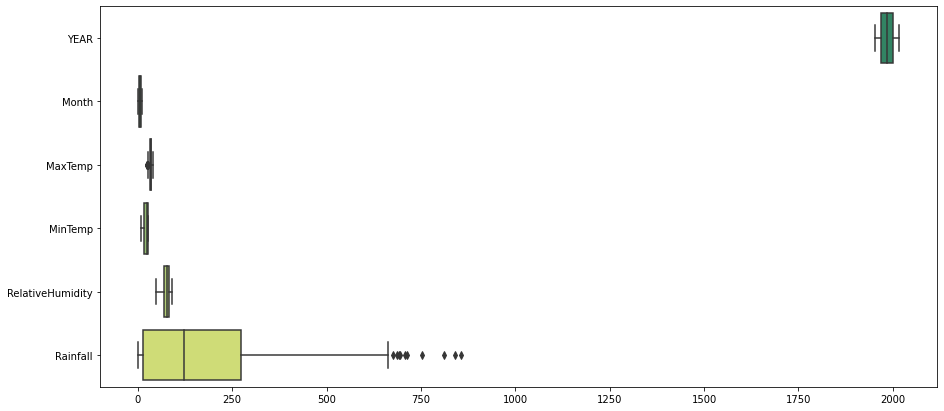

In [ ]:
# boxplot for whole dataset
plt.figure(figsize=(15,7))
sns.boxplot(data=df, orient='h', palette='summer')


<AxesSubplot:xlabel='Rainfall'>

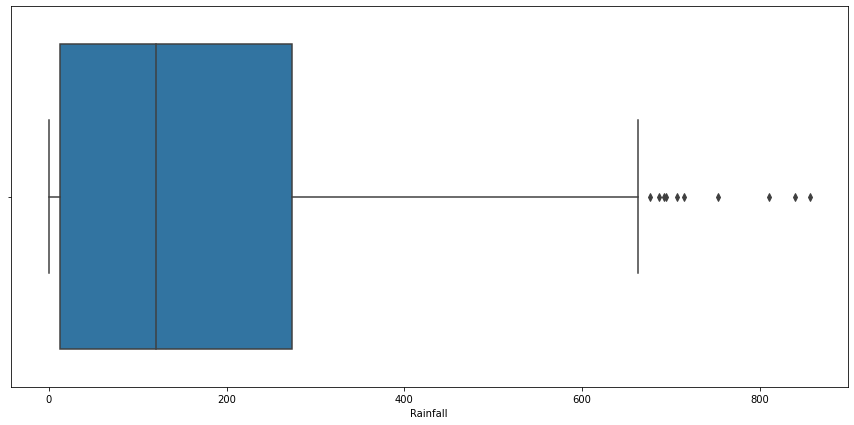

In [ ]:
# single boxplot for column
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Rainfall'])

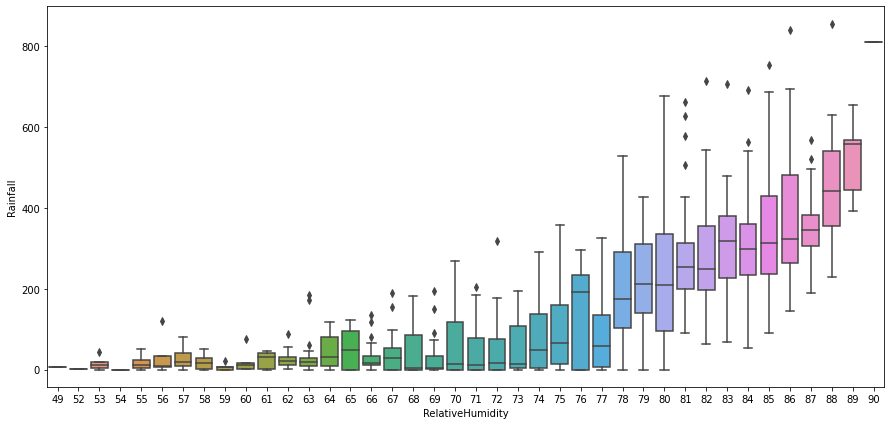

In [ ]:
# boxplot for two variables
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['RelativeHumidity'], y='Rainfall')
plt.show()

<Figure size 1080x504 with 0 Axes>

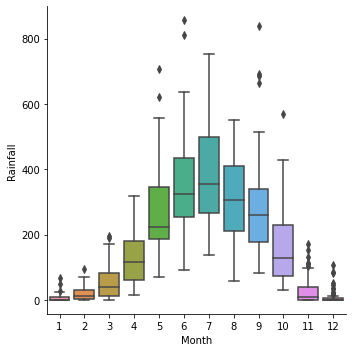

In [ ]:
# category Boxplot
plt.figure(figsize=(15,7))
sns.catplot(data=df, x='Month', y='Rainfall', kind='box')
plt.show()

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'MinTemp'}>],
       [<AxesSubplot:title={'center':'RelativeHumidity'}>,
        <AxesSubplot:title={'center':'Rainfall'}>]], dtype=object)

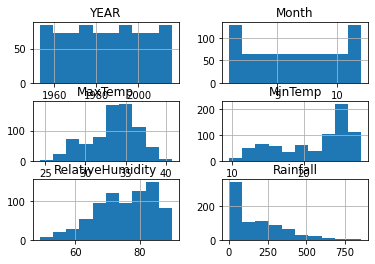

In [ ]:
# Histogram
df.hist()

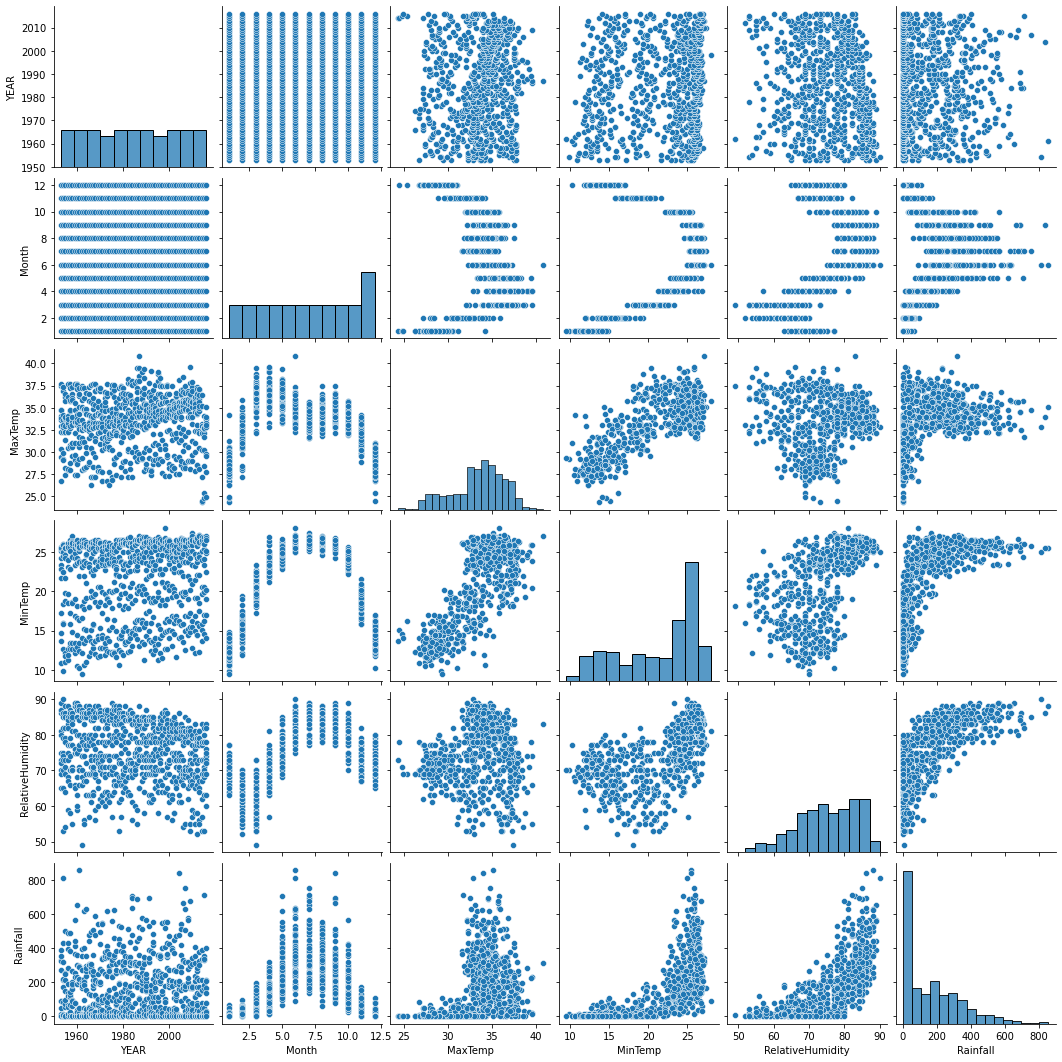

In [ ]:
# pairplot
sns.pairplot(df)

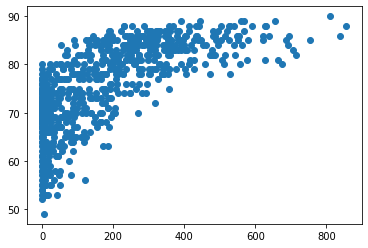

In [ ]:
# scatter plot
plt.scatter(df['Rainfall'], df['RelativeHumidity'])

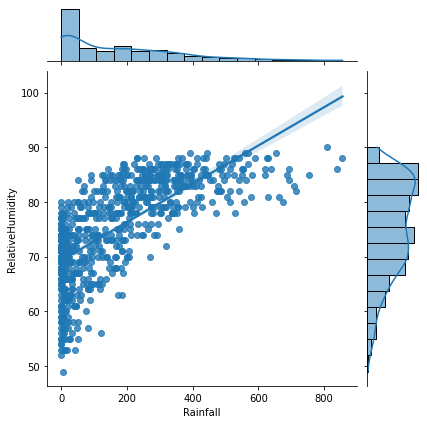

In [ ]:
# jointplot  (scatterplot + distribution plot)
sns.jointplot(data=df, x='Rainfall', y='RelativeHumidity', kind='reg')

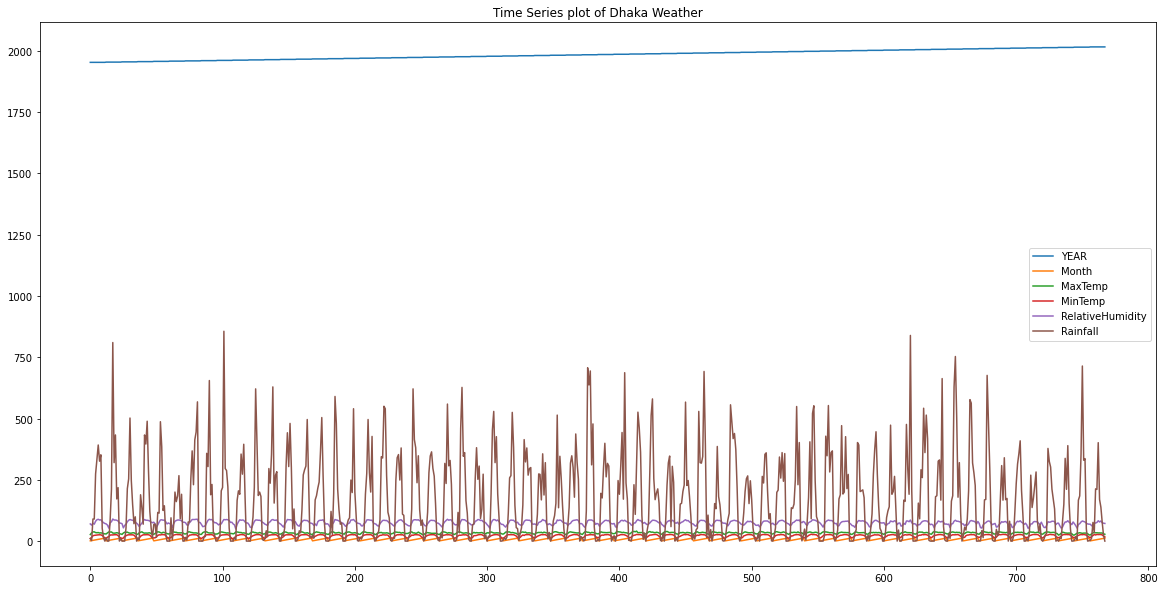

In [ ]:
# Time Series plot
import matplotlib.pyplot as plt
df.plot(figsize=(20,10))
plt.title('Time Series plot of Dhaka Weather')
plt.show()

In [ ]:
df.columns

Index(['YEAR', 'Month', 'MaxTemp', 'MinTemp', 'RelativeHumidity', 'Rainfall'], dtype='object')

<AxesSubplot:title={'center':'Time series plot of MinTemp'}, xlabel='YEAR', ylabel='MinTemp'>

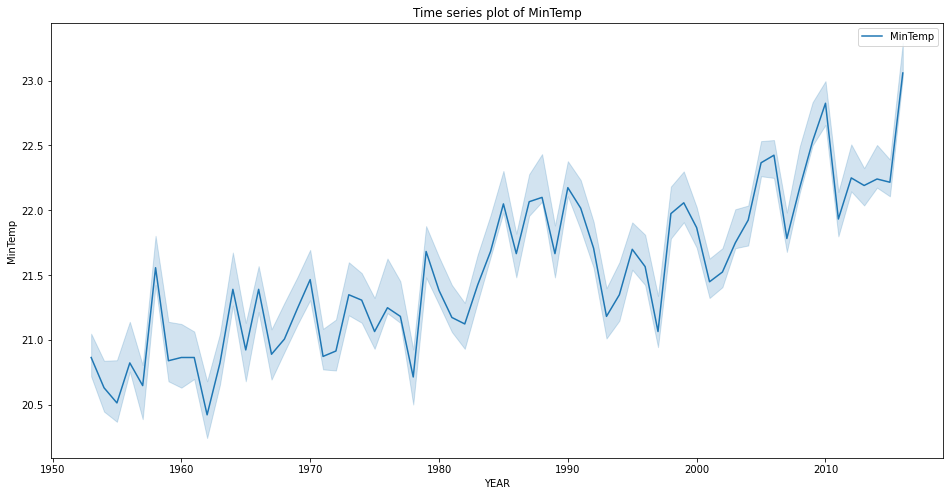

In [ ]:
# MinTemp changes time Series
plt.figure(figsize=(16,8))
plt.title('Time series plot of MinTemp')
sns.lineplot(data=df, x='YEAR', y='MinTemp', ci=10, label='MinTemp')

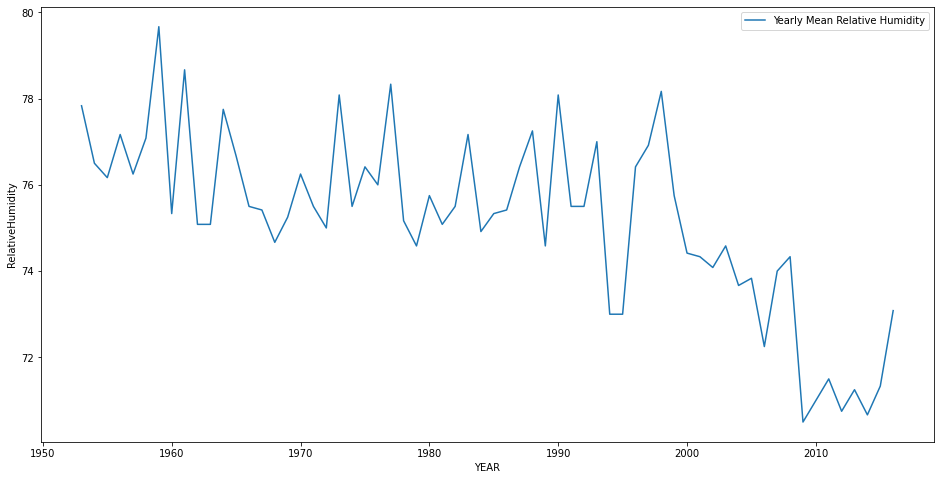

In [ ]:
# Mean RelativeHumidity time series
rh = df.groupby('YEAR')['RelativeHumidity'].mean()
plt.figure(figsize=(16,8))
sns.lineplot(data=rh, label='Yearly Mean Relative Humidity')
plt.show()